In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf



In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

data = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [16]:
(train_images, train_labels), (test_images, test_labels) = data

In [19]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [20]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

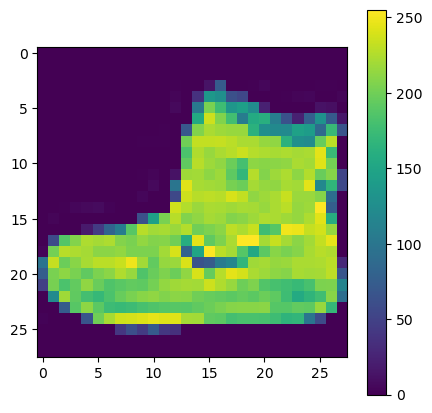

In [21]:
plt.figure(figsize=(5, 5))
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_images = scaler.fit_transform(train_images.reshape(train_images.shape[0], -1))
test_images = scaler.transform(test_images.reshape(test_images.shape[0], -1))

In [29]:
train_images = train_images.reshape(train_images.shape[0], 28, 28)
test_images = test_images.reshape(test_images.shape[0], 28, 28)

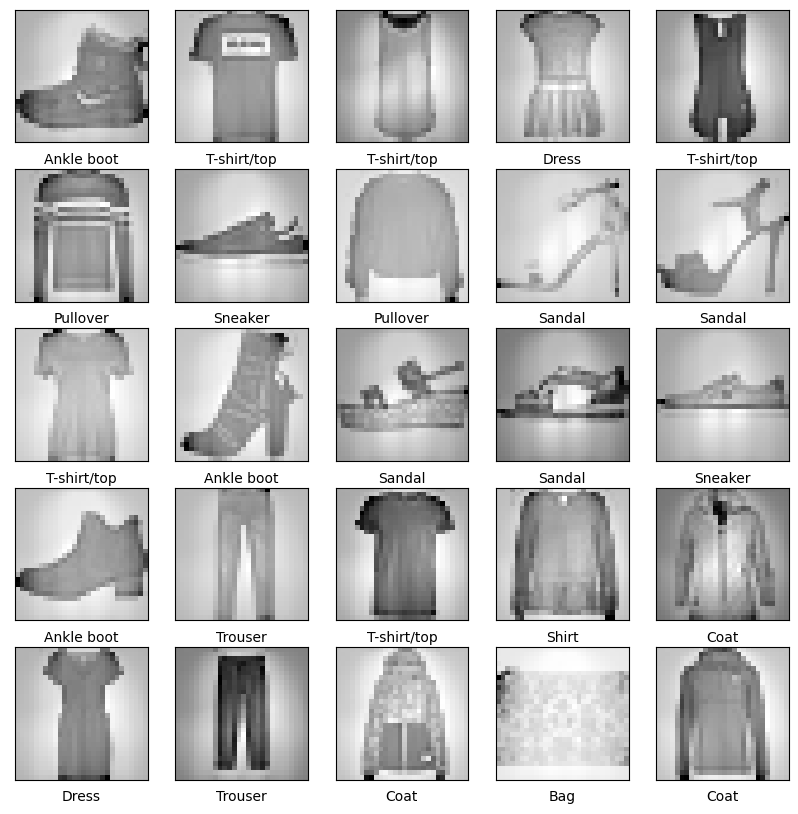

In [36]:
plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [37]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10),
])

2023-02-21 00:08:51.885582: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

In [45]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4441 - accuracy: 0.8439
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3352 - accuracy: 0.8777
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2962 - accuracy: 0.8898
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2706 - accuracy: 0.9012
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2512 - accuracy: 0.9064
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2313 - accuracy: 0.9140
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2228 - accuracy: 0.9176
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2039 - accuracy: 0.9255
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1941 - accuracy: 0.9286
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.186

In [46]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print(f"\nTest Accuracy: {test_acc:.4f}")

313/313 - 1s - loss: 0.4056 - accuracy: 0.8813 - 559ms/epoch - 2ms/step

Test Accuracy: 0.8813


In [47]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])


In [49]:
probability_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 10)                101770    
                                                                 
 softmax (Softmax)           (None, 10)                0         
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [50]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [52]:
# 값들은 각 클래스에 대한 확률로 해석 가능
predictions[0]

array([2.0235579e-13, 5.5931290e-13, 4.0000491e-14, 3.6574728e-13,
       1.8789451e-14, 3.9429378e-04, 1.4012608e-09, 2.4404805e-03,
       3.5118808e-09, 9.9716526e-01], dtype=float32)

In [53]:
np.argmax(predictions[0])

9

In [54]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

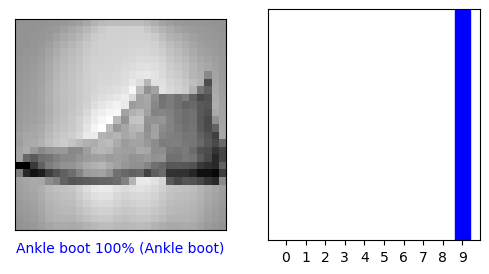

In [55]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

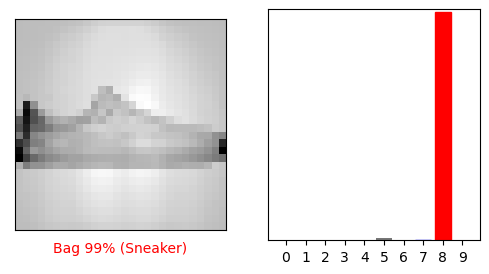

In [56]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

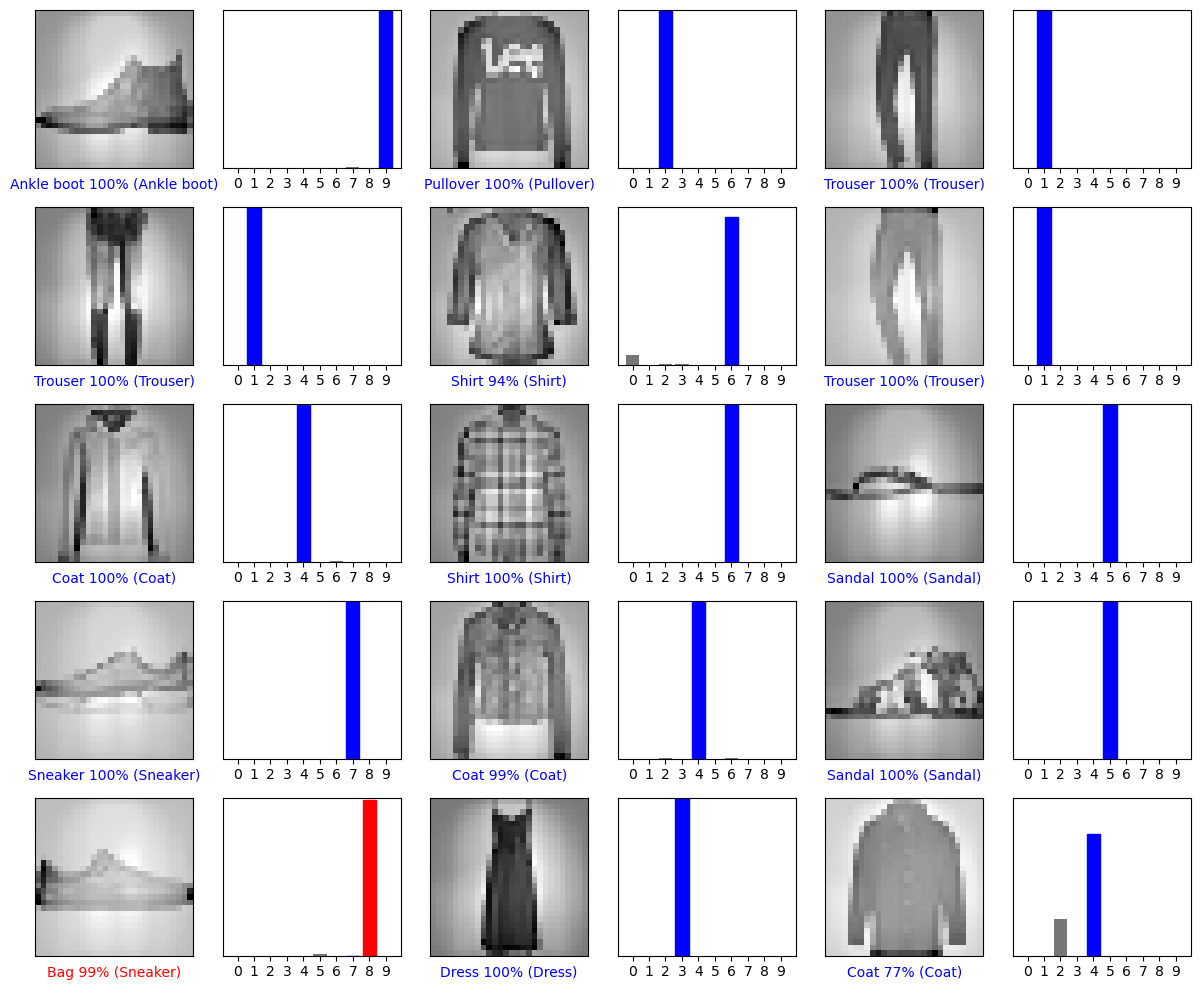

In [57]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## 이미지 1개에 대한 inference

In [59]:
sample_image = test_images[1]

print(sample_image.shape)

(28, 28)


In [63]:
np.expand_dims(sample_image, axis=0).shape

(1, 28, 28)

In [65]:
sample_image = np.expand_dims(sample_image, axis=0)

predictions_single = probability_model.predict(sample_image)

print(class_names[np.argmax(predictions_single)])

1/1 [==============================] - 0s 49ms/step
Pullover
